In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import os
from IPython.display import display

In [ ]:
#Decision Tree Prediction Function with Feature Importance
target = 'Revenue'
def decision_tree(train,test):
    x_train=train.drop(columns=[target])
    y_train=train[target]
    x_test=test.drop(columns=[target])
    y_test = test[target]
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    feature_importances = pd.DataFrame({
        'feature': x_train.columns,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False).reset_index(drop=True)
    return y_test, y_pred, feature_importances

In [ ]:
def load_dataset(csv):
  df = pd.read_csv(csv)
  return df

test_data = pd.read_csv('Test_Set_Files/test_osi.csv') # 80% OF EVERYTHING IN THIS FOLDER

dt_predictions = {}
kfold = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
for k in kfold:
  file = f'SMOTE_files/SM_all_{k}_train.csv'
  df = load_dataset(file)
  if df is not None:
    print(f"File: {file}")
    y_test, y_pred, feature_importances = decision_tree(df,test_data)
    # Create a DataFrame to display y_test and y_pred side by side
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    dt_predictions[k] = results_df
    print(file)
    print(feature_importances)
  else:
    print(f"File {file} not found or is empty.")

File: SMOTE_files/SM_all_1_train.csv
SMOTE_files/SM_all_1_train.csv
                          feature  importance
0                      PageValues    0.651897
1                 SessionDuration    0.043788
2                           Month    0.041604
3         Administrative_Duration    0.031593
4         ProductRelated_Duration    0.028170
5                       ExitRates    0.027903
6                TotalPagesViewed    0.025752
7                     BounceRates    0.024267
8                  ProductRelated    0.023552
9                  Administrative    0.021606
10         Informational_Duration    0.014257
11                    TrafficType    0.014206
12                        Browser    0.013283
13                         Region    0.012593
14                  Informational    0.010322
15               OperatingSystems    0.008514
16                        Weekend    0.003740
17  VisitorType_Returning_Visitor    0.001812
18        VisitorType_New_Visitor    0.000912
19          

In [ ]:
#Calculate the average accuracy of the decision tree predictions across all folds
accuracy = 0
tp = 0
tn = 0
fp = 0
fn = 0

for k, results in dt_predictions.items():
    tp += ((results['Actual'] == 1) & (results['Predicted'] == 1)).sum() # True Positives
    tn += ((results['Actual'] == 0) & (results['Predicted'] == 0)).sum() # True Negatives
    fn += ((results['Actual'] == 1) & (results['Predicted'] == 0)).sum() # False Negatives
    fp += ((results['Actual'] == 0) & (results['Predicted'] == 1)).sum() # False Positives
avgtp = tp / len(dt_predictions)
avgtn = tn / len(dt_predictions)
avgfn = fn / len(dt_predictions)
avgfp = fp / len(dt_predictions)

#print("Average accuracy across all folds:", accuracy)
#print("True Positive Values across Dictionary", tp)
print("Avg. True Positive across all folds",avgtp) #Average True Positives across all folds
#print("True Negative Values across Dictionary", tn)
print("Avg. True Negatives across all folds",avgtn) 
#print("False Negative Values across Dictionary", fn)
print("Avg. False Negatives across all folds",avgfn)
#print("False Positive Values across Dictionary", fp)
print("Avg. False Positive across all folds",avgfp)

accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = (2 * tp) / (2 * tp + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (fn + tp)

print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("True Positive Rate:", true_positive_rate)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)



Avg. True Positive across all folds 242.1
Avg. True Negatives across all folds 1832.2
Avg. False Negatives across all folds 139.9
Avg. False Positive across all folds 251.8
Accuracy: 0.8411597729115977
F1 Score: 0.5528028313734444
Precision: 0.49018019842073296
Recall: 0.6337696335078534
True Positive Rate: 0.6337696335078534
False Positive Rate: 0.1208253358925144
False Negative Rate: 0.3662303664921466


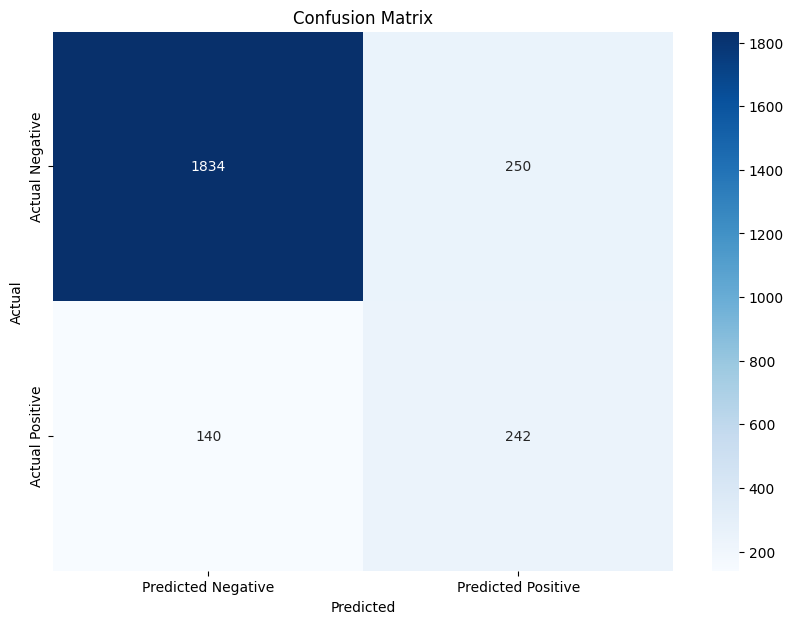

In [ ]:
#Confusion Matrix to test Results
import matplotlib.pyplot as plt

#Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()